In [6]:
import os
import pickle
import numpy as np
import tensorflow.keras as keras
data_dir = "prepped_data/train/"

In [7]:
import tensorflow as tf
config = tf.ConfigProto()
 
# Don't pre-allocate memory; allocate as-needed
config.gpu_options.allow_growth = True

In [8]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Lambda, concatenate
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.layers import Input


model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', 
                 input_shape=(128, 128, 2)
                 
                ))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))              
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(.5))

def slice_tensor(i):
    return Lambda(lambda x: x[:, :, :, i:i + 1])
x = Input((128, 128, 4))

a = concatenate([slice_tensor(0)(x), slice_tensor(2)(x)], -1)
b = concatenate([slice_tensor(1)(x), slice_tensor(3)(x)], -1)
a = model(a)
b = model(b)

y = concatenate([a, b])


y = Dense(1024, activation='relu')(y)
y = Dropout(.5)(y)
y = Dense(12)(y)

model = keras.Model(x, y)
model.summary()

model.compile(loss=keras.losses.mean_squared_error,
              optimizer=Adam(lr=.0002))




__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 128, 128, 4)  0                                            
__________________________________________________________________________________________________
lambda_4 (Lambda)               (None, 128, 128, 1)  0           input_2[0][0]                    
__________________________________________________________________________________________________
lambda_5 (Lambda)               (None, 128, 128, 1)  0           input_2[0][0]                    
__________________________________________________________________________________________________
lambda_6 (Lambda)               (None, 128, 128, 1)  0           input_2[0][0]                    
__________________________________________________________________________________________________
lambda_7 (

In [9]:
import ultrasoundgeneration
import importlib
importlib.reload(ultrasoundgeneration)


tdata, tclasses = ultrasoundgeneration.load_dataset(ultrasoundgeneration.test_volumes_path)

In [13]:
while True:
    data, classes = ultrasoundgeneration.load_dataset(ultrasoundgeneration.train_volumes_path)
    model.fit(data, 
          classes,
          batch_size=90,
          epochs=1,
          verbose=1,
          validation_data=(tdata[:256], tclasses[:256]))

Train on 8704 samples, validate on 256 samples
Epoch 1/1
8704/8704 [==============================] - 16s 2ms/step - loss: 1.4569 - val_loss: 1.4149
Train on 8704 samples, validate on 256 samples
Epoch 1/1
8704/8704 [==============================] - 16s 2ms/step - loss: 1.4290 - val_loss: 1.4350
Train on 8704 samples, validate on 256 samples
Epoch 1/1
8704/8704 [==============================] - 16s 2ms/step - loss: 1.4427 - val_loss: 1.4099
Train on 8704 samples, validate on 256 samples
Epoch 1/1
8704/8704 [==============================] - 16s 2ms/step - loss: 1.4273 - val_loss: 1.4038
Train on 8704 samples, validate on 256 samples
Epoch 1/1
8704/8704 [==============================] - 15s 2ms/step - loss: 1.4275 - val_loss: 1.3305
Train on 8704 samples, validate on 256 samples
Epoch 1/1
8704/8704 [==============================] - 15s 2ms/step - loss: 1.4022 - val_loss: 1.4421
Train on 8704 samples, validate on 256 samples
Epoch 1/1
8704/8704 [==============================] - 15s 

KeyboardInterrupt: 

In [ ]:
model.load_weights("fake_ultrasound_model")

In [24]:
"""
import random
for _ in range(20):
    print("===========")
    random.shuffle(names)
    for name in names:
        print(name)
        data, classes = load_dataset(data_dir + name)
        loss_curve = model.fit(data, 
              classes,
              batch_size=512,
              epochs=1,
              verbose=1,
              validation_data=(tdata[:256], tclasses[:256]))"""

TypeError: load_dataset() takes 0 positional arguments but 1 was given

In [16]:
model.compile(loss=keras.losses.mean_squared_error,
              optimizer=Adam(lr=.0002))

In [11]:
rclasses = model.predict(tdata)

In [14]:
tdata.shape

(1024, 128, 128, 4)

In [10]:
tclasses[0]

array([ 1.2575734 ,  1.29794078,  0.05396907, -0.20210246, -4.00902521,
       -0.2346668 ,  4.01584815, -0.2601613 ,  2.14899592,  0.01775605,
       -2.16169764, -0.05845837])

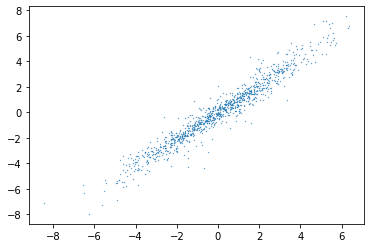

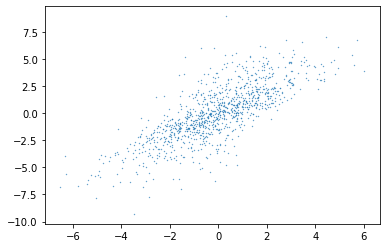

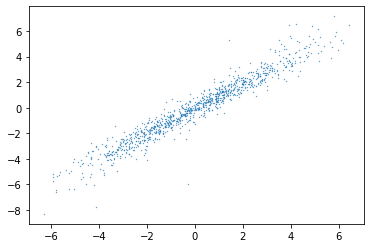

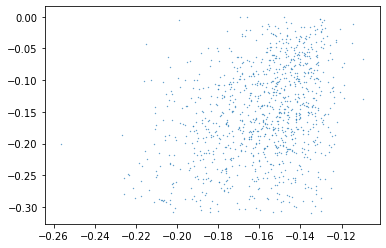

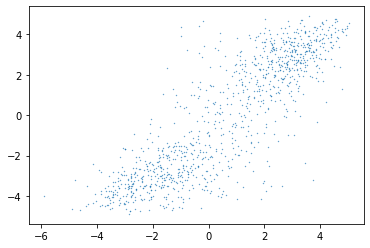

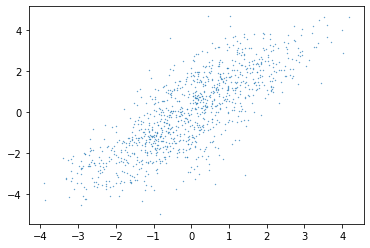

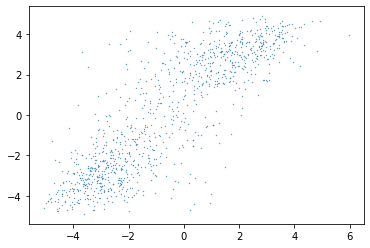

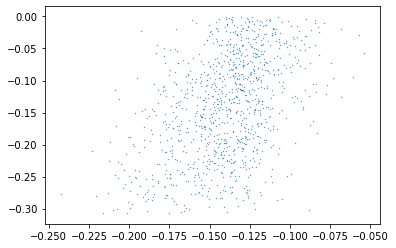

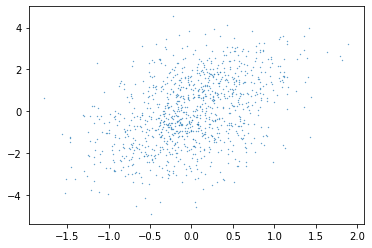

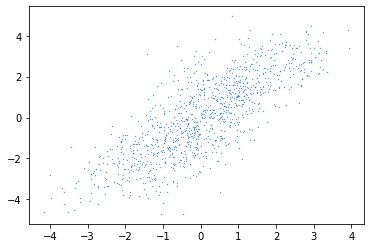

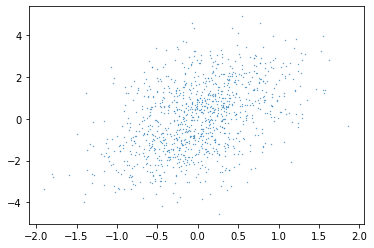

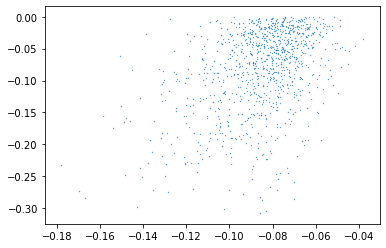

In [12]:
import matplotlib.pyplot as plt
for j in range(12):
    plt.scatter(rclasses[:, j], tclasses[:2000, j], s=.1)
    plt.show()

In [20]:
model.save("fake_ultrasound_model3")

In [3]:
import matplotlib

In [4]:
plt.scatter?

Object `plt.scatter` not found.


In [4]:
tclasses[:2000, j]import tensorflow
tensorflow.test.is_gpu_available()

True

In [29]:
import tensorflow as tf
with tf.Session() as sess:
    devices = sess.list_devices()

In [1]:
import sys
sys.executable

'/home/hastings/anaconda3/envs/stylegan/bin/python'

In [38]:
#with open("prepped_data/chunk0.pickle", 'wb') as c0:
#    pickle.dump([data, classes], c0, protocol=4)

In [3]:
import pickle
data, classes = pickle.load(open("prepped_data/chunk0.pickle", "rb"))

In [42]:
data.dtype


dtype('float32')

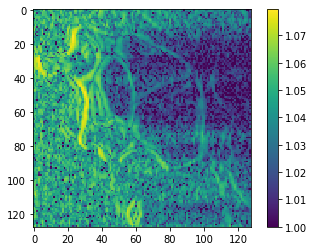

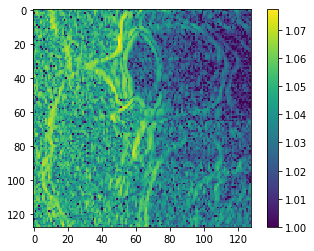

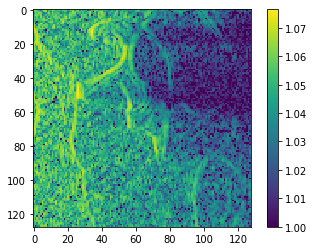

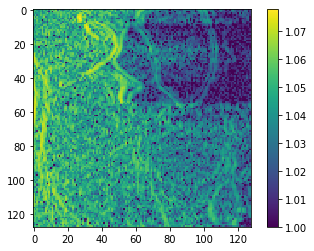

In [41]:
import matplotlib.pyplot as plt
for i in range(4):b 
    plt.imshow(tdata[np.random.randint(tdata.shape[0]), :, :, i] / 10 + 1)
    plt.colorbar()
    plt.show()

In [16]:
tdata.shape

(1024, 128, 128, 4)

In [25]:
error = tclasses - rclasses

In [34]:
np.sum(np.abs(error[37]))

9.943279439138704